# **DECISION TREE**

## 1. Introdu√ß√£o

Uma √°rvore de decis√£o √© (Decision Tree) um algoritmo de aprendizagem supervisionada n√£o param√©trico, utilizado para tarefas de classifica√ß√£o e regress√£o. Possui uma estrutura hier√°rquica em √°rvore, que consiste num n√≥ raiz, ramos, n√≥s internos e n√≥s folha.
Fonte: https://www.ibm.com/topics/decision-trees

<img src="assets\Decision-Tree.png" alt="Decision-Tree" style="display: block; margin: auto; width: 500px;"/>

## 1.1. Objectivo

Treinar um modelo atraves do algoritmo (Decision Tree) para prever uma vari√°vel de destino com base nos demais atributos do conjunto de dados. Neste caso, o objetivo √© treinar o modelo para prever a probabilidade de um edif√≠cio apresentar uma reivindica√ß√£o de seguro durante o per√≠odo de cobertura.

## 1.2. Informa√ß√£o dos dados

Trata-se de registros de inspe√ß√µes realizadas em edif√≠cios na Nig√©ria, onde coletamos dados sobre estruturas que sofreram danos por diversos motivos. Para mais detalhes, recomendo consultar o notebook <a href="data_cleaning.ipynb">Link de Limpeza de Dados</a>, ou visitar a plataforma da Zindi, de onde os dados foram extra√≠dos.

## 2. Importar dados e Bibliotecas

- Certifique-se de que as bibliotecas necess√°rias est√£o instaladas para garantir o correto funcionamento do c√≥digo.
- Caso ainda n√£o tenha as bibliotecas instaladas, utilize a c√©lula abaixo para instalar.

Caso n√£o tenha as bibliotecas instaladas, remova o coment√°rio `#` da c√©lula abaixo e execute para instalar:

In [6]:
# !pip install pandas seaborn matplotlib scikit-learn

In [8]:
import pandas as pd #para leitura de dados
import seaborn as sns #para viauslizar dados
import matplotlib.pyplot as plt #para imprimir graficos
from sklearn.metrics import confusion_matrix #para mostrar a confus√£o do modelo
from sklearn.preprocessing import StandardScaler, LabelEncoder #para pr√©-processar os dados
from sklearn.model_selection import train_test_split #funcao para dividir os dados
from sklearn.tree import DecisionTreeClassifier #o algoritmo
from sklearn.tree import plot_tree #para mostrra a √°rvore geranda
import matplotlib.pyplot as plt #para imprimir figuras ou gr√°ficos
from sklearn.metrics import accuracy_score, classification_report #para medir o desempenho

In [10]:
# carregar dados j√° limpos
data = pd.read_csv('https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/main/datasets/aprendizagem-supervisionada/data_cleaned.csv')

# mostrar um resumo do que temos nos dados
data.head()


YearOfObservation  Insured_Period  Residential Building_Painted  \
0               2013             1.0            0                N   
1               2015             1.0            0                V   
2               2014             1.0            0                N   
3               2013             1.0            0                V   
4               2014             1.0            0                V   

  Building_Fenced Garden Settlement  Building Dimension  Building_Type  \
0               V      V          U               290.0              1   
1               N      O          R               490.0              1   
2               V      V          U               595.0              1   
3               V      V          U              2840.0              1   
4               N      O          R               680.0              1   

   Date_of_Occupancy  NumberOfWindows Geo_Code  Claim  
0             1960.0                4     1053      0  
1             1850.0                4     1053      0  
2             1960.0                4     1053      0  
3             1960.0                4     1053      0  
4             1800.0                3     1053      0

## 3. Normalizar os dados

Converter dados categ√≥ricos, quando necess√°rio, em valores num√©ricos pode ser realizado utilizando t√©cnicas como one-hot encoding ou label encoding, uma vez que os algoritmos de machine learning, por natureza, n√£o processam textos, mas sim valores num√©ricos, como 0 e 1. Esse tipo de transforma√ß√£o √© essencial para que os modelos consigam interpretar e processar adequadamente as informa√ß√µes categ√≥ricas.

_________________________________________________________

Vantagens e Desvantagens:

1. One-hot encoding (convers√£o para m√∫ltiplas colunas bin√°rias)<br>
    Vantagem - Garante que o modelo interprete corretamente categorias que n√£o possuem uma rela√ß√£o de ordem. <br>
    Desvantagem - Pode gerar um aumento significativo no n√∫mero de colunas, especialmente em casos com muitas categorias.


2. Label encoding (atribui√ß√£o de valores inteiros)<br>
    Vantagem - Mant√©m o n√∫mero de colunas inalterado ou pequeno. <br>
    Desvantagem: Pode induzir uma ordem artificial entre as categorias, o que nem sempre √© desej√°vel.


_________________________________________________________

Colunas como **Building_Painted, Building_Fenced, Garden, Settlement**, que s√£o categ√≥ricas e representadas por strings como "V", "N", precisam ser convertidas para valores num√©ricos a fim de serem utilizadas de forma eficiente no modelo.

In [ ]:
# Converta vari√°veis ‚Äã‚Äãcateg√≥ricas usando a codifica√ß√£o de r√≥tulos
label_encoder = LabelEncoder()
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Geo_Code']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Estandardizar colunas num√©ricas usando o StandardScaler
scaler = StandardScaler()
numerical_columns = ['Building Dimension', 'YearOfObservation', 'Insured_Period', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Claim']  #numerical columns

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## 4. Divis√£o

- Vari√°veis preditoras (X): Todas as colunas exceto a vari√°vel alvo.
- Vari√°vel alvo (y): A vari√°vel que voc√™ deseja prever (o "target"). No nosso caso √© o Residential.

In [ ]:
# os recursos (X) e o destino (y)
X = data.drop(columns=['Residential'])  # Features (drop the target column)
y = data['Residential']  # Target variable

Dividimos o dataset em conjuntos de treino (para ajustar o modelo) e conjuntos de teste (para avaliar o desempenho do modelo).
- Geralmente, uma divis√£o de 80/20 ou 70/30 √© utilizada.

In [ ]:
# Divida os dados em conjuntos de treino e teste (80% de treino, 20% de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Treino

In [ ]:
# Inicializar e treinar o modelo de √°rvore de decis√£o
decision_tree_model = DecisionTreeClassifier()

#treinando o modelo
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 6. Analise dos resultados

In [ ]:
# Fa√ßa previs√µes e avalie o modelo
y_pred = decision_tree_model.predict(X_test)

#  Calculando accuracias
accuracy = accuracy_score(y_test, y_pred)

# calculando outrs metricas
classification_rep = classification_report(y_test, y_pred)

print(f"Acur√°cia: {accuracy}\n")
print(f"Relat√≥rio de classifica√ß√£o: \n{classification_rep}")

Acur√°cia: 0.7848699763593381

Relat√≥rio de classifica√ß√£o: 
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1466
           1       0.65      0.66      0.65       649

    accuracy                           0.78      2115
   macro avg       0.75      0.75      0.75      2115
weighted avg       0.79      0.78      0.79      2115



0.7815 ou cerca de 78%. <br>
A acur√°cia mede a porcentagem de previs√µes corretas em rela√ß√£o ao total de inst√¢ncias. Neste caso, o modelo fez previs√µes corretas em 78% dos casos, combinando as duas classes (0 e 1).

Este relat√≥rio inclui m√©tricas como precis√£o (precision), revoca√ß√£o (recall) e f1-score para cada classe (0 e 1), al√©m de uma m√©trica geral.
<br><br>
- A precis√£o √© importante quando o foco √© evitar falsos positivos.
<br><br>
- A revoca√ß√£o √© √∫til para avaliar o quanto o modelo consegue capturar todos os verdadeiros positivos, sendo relevante quando queremos minimizar falsos negativos.
<br><br>
- O f1-score √© a m√©dia harm√¥nica entre a precis√£o e a revoca√ß√£o. Um bom equil√≠brio entre essas duas m√©tricas, especialmente √∫til quando temos classes desbalanceadas, como parece ser o caso aqui (1466 para classe 0, 649 para classe 1).

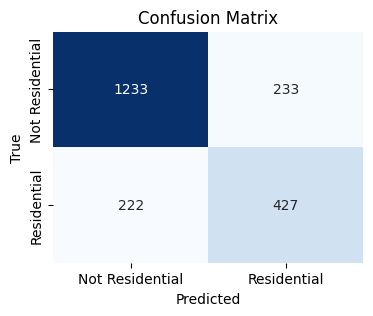

In [ ]:
# Gerando a matrix de confis√£o
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimindo a matrix de confusoa
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Residential', 'Residential'],
            yticklabels=['Not Residential', 'Residential'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A diagonal principal da matriz de confus√£o representa os acertos (previs√µes corretas), enquanto os elementos fora da diagonal principal (a "diagonal secund√°ria") representam os erros (falsos positivos e falsos negativos).<br><br>

Interpreta√ß√£o: <br>
- O modelo previu corretamente 1231 casos como 0 e 422 casos como 1.
- Houve 227 erros onde o modelo previu incorretamente 0 quando o verdadeiro valor era 1 (falsos negativos).
- Houve 235 erros onde o modelo previu 1 quando o verdadeiro valor era 0 (falsos positivos).

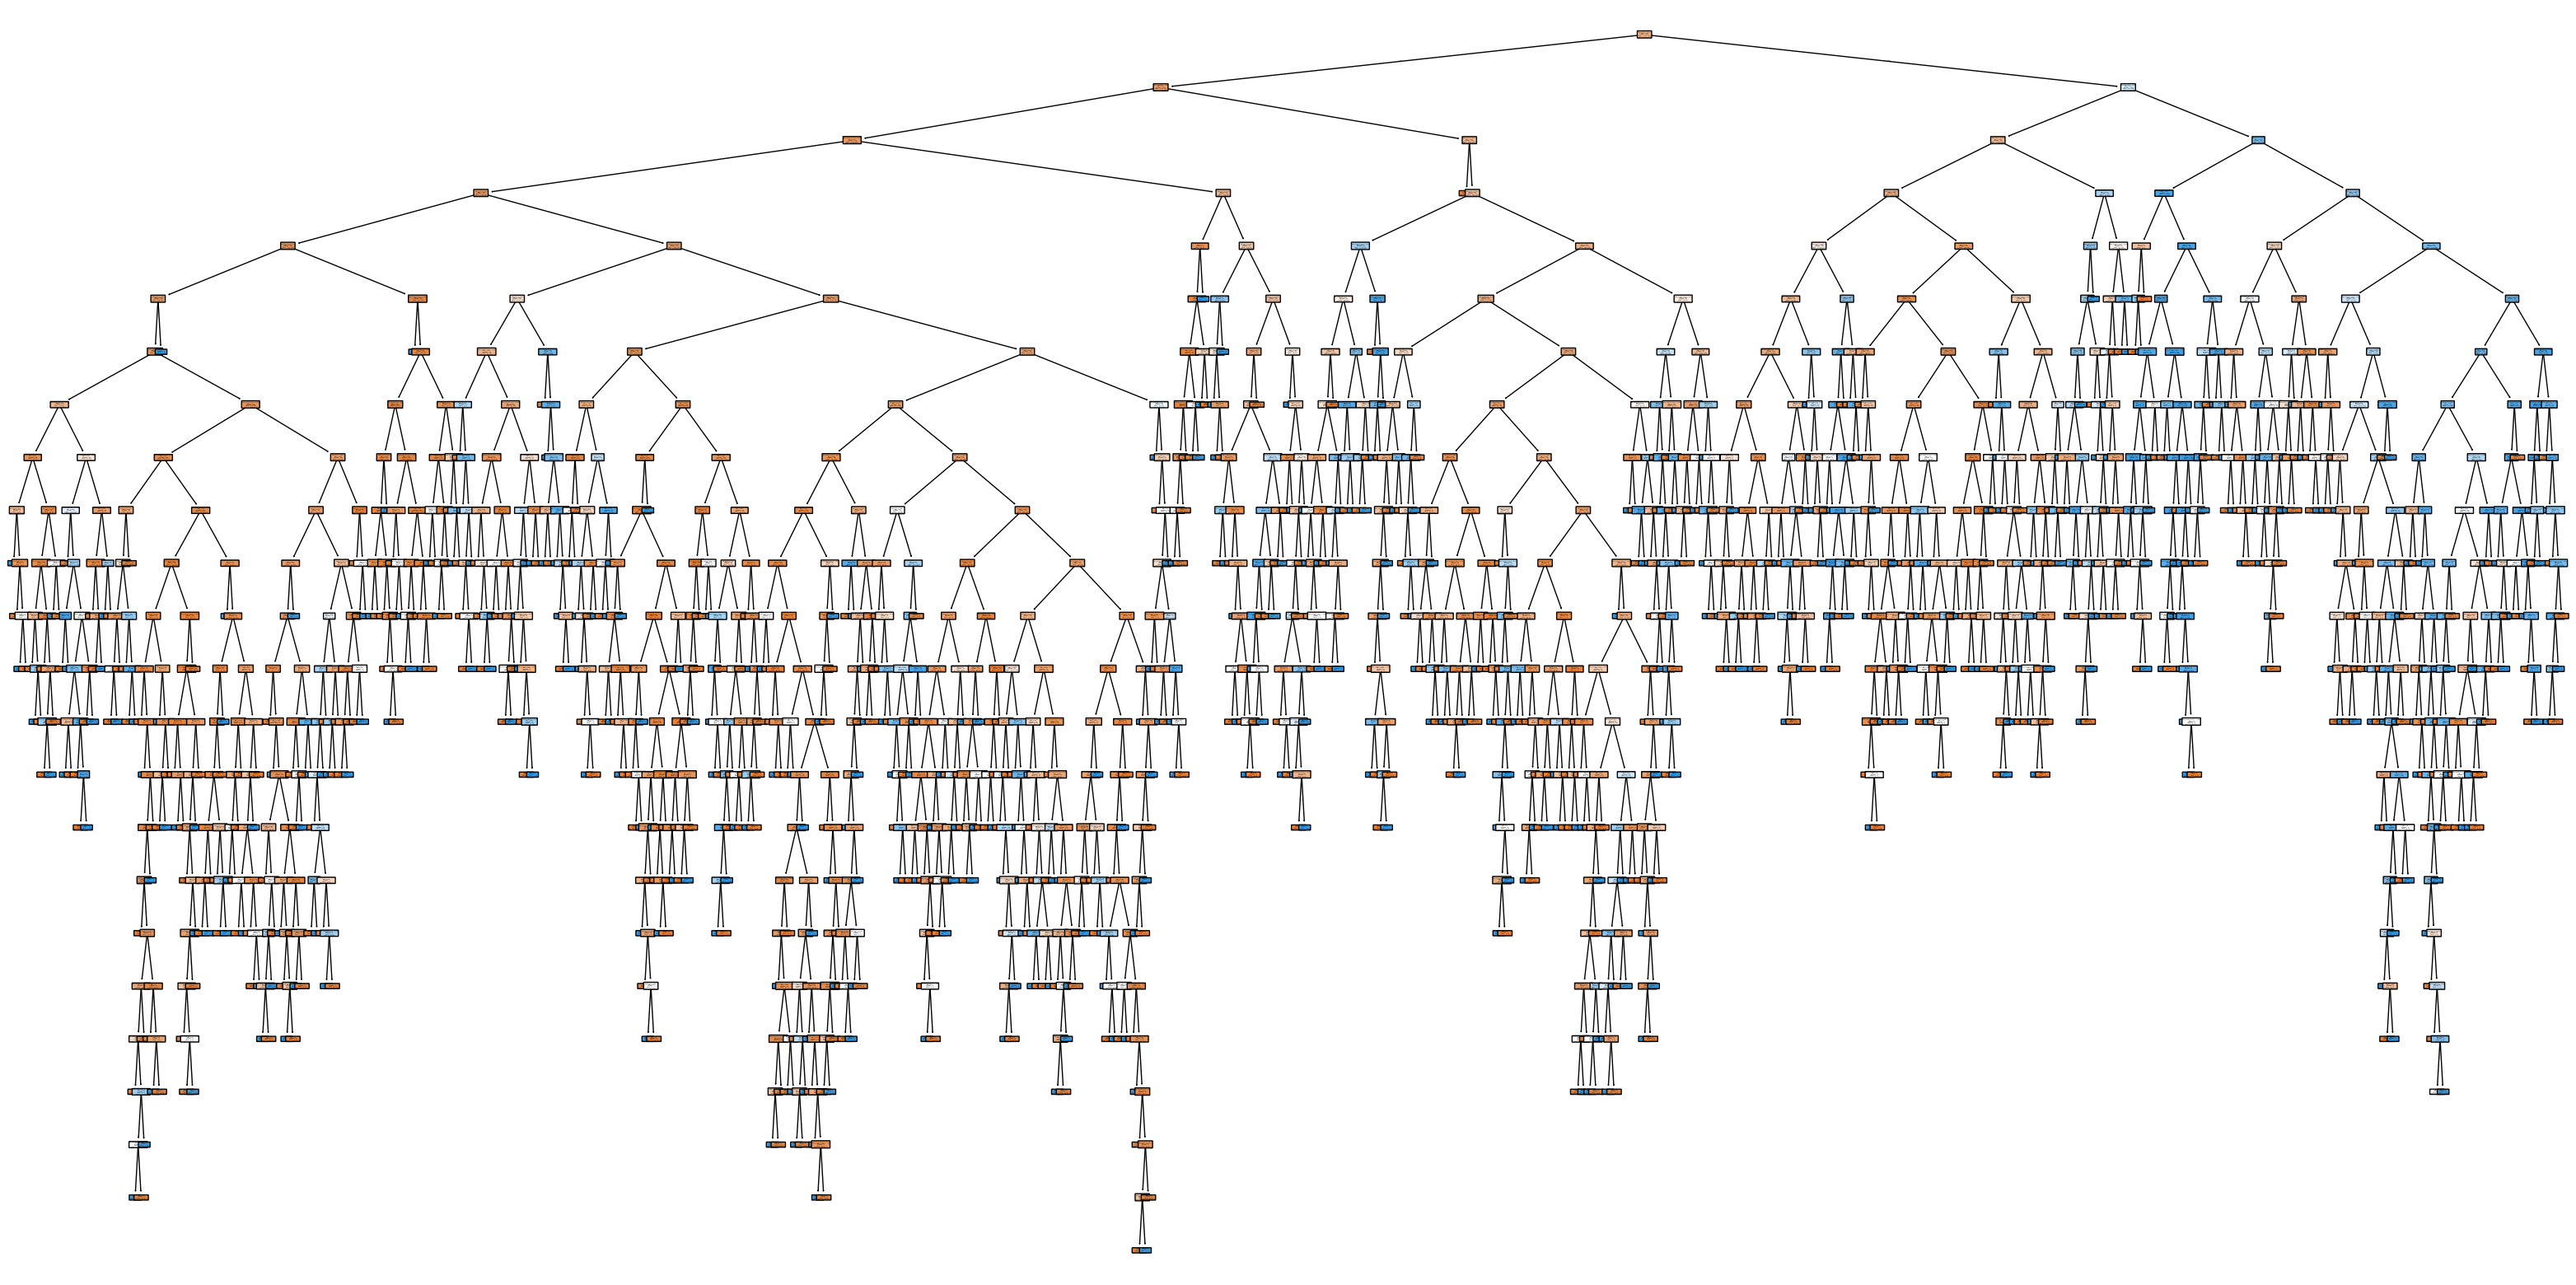

In [ ]:
# Ajustar o tamanho da figura
plt.figure(figsize=(40,20))

# Plotar a √°rvore de decis√£o treinada
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Non-Residential', 'Residential'], filled=True, rounded=True)

# Mostrar o gr√°fico
plt.show()


- A √°rvore de decis√£o divide os dados em subconjuntos em cada n√≥ com base em um crit√©rio de divis√£o.
- Cada n√≥ da √°rvore cont√©m uma condi√ß√£o de divis√£o que tenta separar os dados em duas ou mais classes.

_______________________________________

*"Em algum lugar, algo incr√≠vel est√° esperando para ser descoberto."* - Carl Sagan

TEM MAIS üöÄüöÄ

Ver mais: <a herf="data_cleaning.ipynb">Data Cleaning</a> <br>
Ver mais: <a herf="decision_tree.ipynb">Supporte Vector Machine</a>

by Do Ros√°rio, Euclides